# Ogita-Aishima Refinement Method Demonstration

This notebook demonstrates the effect of the Ogita-Aishima (OA) iterative refinement method for correcting the trajectory of eigenpairs. We will compare it with the standard matching correction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from eigenpairflow import eigenpairtrack

## Problem Setup

We will set up a problem with clustered eigenvalues to highlight the strength of the Ogita-Aishima method.

In [2]:
n = 5
D_diag = np.array([1.0, 1.0 + 1e-6, 3.0, 4.0, 5.0])
A_base = np.diag(D_diag)

# A time-dependent perturbation
np.random.seed(42) # for reproducibility
P = np.random.rand(n, n)
P = (P + P.T) / 2

def A_func(t):
    return A_base + t * P

def dA_func(t):
    return P

t_start, t_end = 0.0, 0.1
t_eval = np.linspace(t_start, t_end, 100)

## Run Tracking with Standard Matching Correction

In [3]:
results_matching = eigenpairtrack(
    A_func,
    dA_func,
    (t_start, t_end),
    t_eval,
    correction_method='matching'
)

## Run Tracking with Ogita-Aishima Correction

In [4]:
results_oa = eigenpairtrack(
    A_func,
    dA_func,
    (t_start, t_end),
    t_eval,
    correction_method='ogita_aishima'
)

## Compare Norm Errors

We plot the Frobenius norm of the error `||A(t) - Q(t)D(t)Q(t)^T||` for both methods. A smaller error indicates a more accurate decomposition.

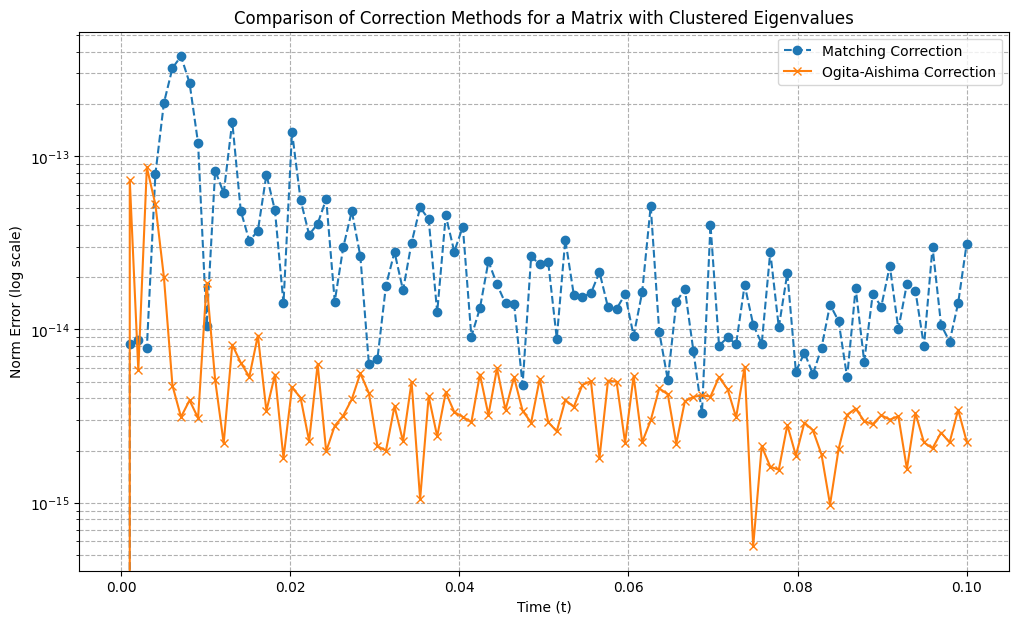

In [5]:
plt.figure(figsize=(12, 7))
plt.plot(results_matching.t_eval, results_matching.norm_errors, label='Matching Correction', marker='o', linestyle='--')
plt.plot(results_oa.t_eval, results_oa.norm_errors, label='Ogita-Aishima Correction', marker='x', linestyle='-')
plt.yscale('log')
plt.xlabel('Time (t)')
plt.ylabel('Norm Error (log scale)')
plt.title('Comparison of Correction Methods for a Matrix with Clustered Eigenvalues')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()